In [2]:
import pickle
cistopic_obj = pickle.load(open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.18.cistopic_obj.pkl', 'rb'))


In [3]:
metadf=cistopic_obj.cell_data
cleandf=metadf[metadf["id"].notna()]
cleandf
cellname=cleandf['idbarcode.1'].values.tolist()
cistopic_obj_sub = cistopic_obj.subset(cells=cellname,copy=True)

In [4]:
print(cistopic_obj_sub)
cistopic_obj_sub.cell_data['sample_id']

sub_df= cistopic_obj_sub.cell_data
cistopic_obj_sub.add_cell_data(sub_df)
cistopic_obj_sub
cistopic_obj_sub.projections['cell']

CistopicObject from project cisTopic_merge with n_cells × n_regions = 232486 × 505139
Columns ['barcode', 'Log_total_nr_frag', 'nCount_SCT', 'nCount_RNA', 'cisTopic_log_nr_acc', 'orig.ident', 'Log_unique_nr_frag', 'nucleosome_signal', 'id', 'nCount_peaks', 'Unique_nr_frag', 'SCT_snn_res.0.8', 'seurat_clusters', 'nFeature_peaks', 'Timepoints', 'peaks_snn_res.0.8', 'n200_k33', 'nFeature_ATAC', 'nFeature_RNA', 'nCount_ATAC', 'Total_nr_frag', 'cisTopic_nr_acc', 'FRIP', 'Total_nr_frag_in_regions', 'annotation', 'TSS.enrichment', 'Dupl_nr_frag', 'percent.mt', 'TSS_enrichment', 'n200', 'Dupl_rate', 'cisTopic_nr_frag', 'celltype', 'nFeature_SCT', 'idbarcode.1', 'TSS.percentile', 'Participants', 'sample_id', 'nucleosome_percentile', 'Dlabel', 'Unique_nr_frag_in_regions', 'RNA_snn_res.0.3', 'cisTopic_log_nr_frag'] will be overwritten


{}

In [5]:
pickle.dump(cistopic_obj_sub,
            open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.24.sub_cistopic_obj.pkl', 'wb'))

In [6]:
models = pickle.load(open('/DATA1/zhang_lab/tmp/model/2.22.muliti_model_sub.pkl', 'rb'))

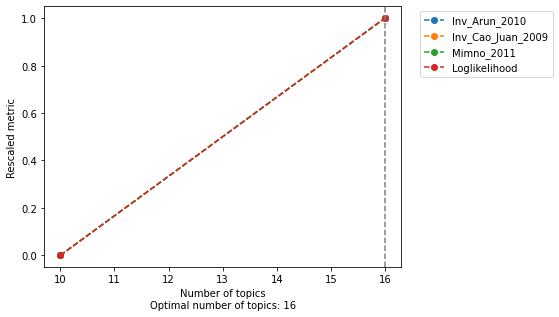

In [7]:
from pycisTopic.lda_models import *
model=evaluate_models(models,
                     select_model=16,
                     return_model=True,
                     metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                     plot_metrics=False,
                     save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/models/2.23.model_selection.pdf')

In [8]:
cistopic_obj_sub.add_LDA_model(model)
from pycisTopic.clust_vis import *
run_umap(cistopic_obj_sub,target  = "cell", scale=False)

2023-02-24 19:48:50,636 cisTopic     INFO     Running UMAP


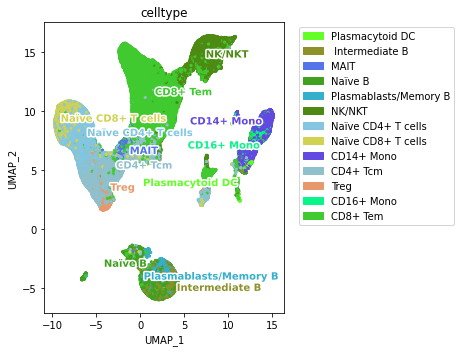

In [35]:
plot_metadata(cistopic_obj_sub,
                 reduction_name='UMAP',
                 variables=['celltype'], # Labels from RNA and new clusters
                 target='cell', num_columns=2,
                 text_size=10,
                 dot_size=5,
                 figsize=(10,5),
              show_legend=True,
                 save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.23.dimensionality_reduction_label_uncorrected.celltype.pdf')

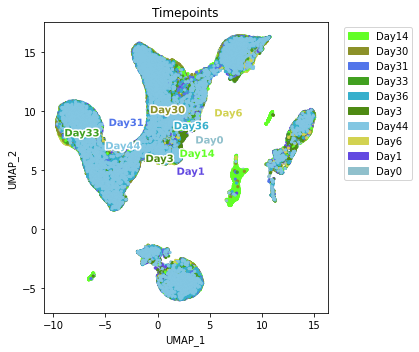

In [36]:
plot_metadata(cistopic_obj_sub,
                 reduction_name='UMAP',
                 variables=['Timepoints'], # Labels from RNA and new clusters
                 target='cell', num_columns=2,
                 text_size=10,
                 dot_size=5,
                 figsize=(10,5),
              show_legend=True,
                 save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.23.dimensionality_reduction_label_uncorrected_timepoint.pdf')

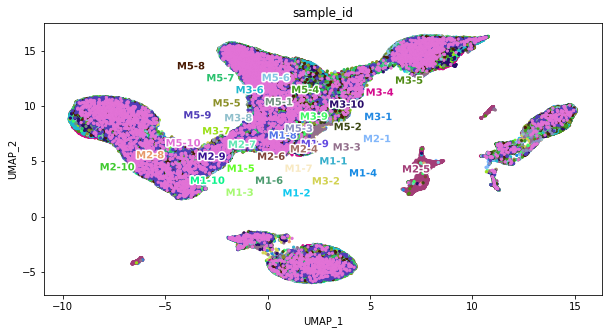

In [40]:
plot_metadata(cistopic_obj_sub,
                 reduction_name='UMAP',
                 variables=['sample_id'], # Labels from RNA and new clusters
                 target='cell', num_columns=1,
                 text_size=10,
                 dot_size=5,
                 figsize=(10,5),
                 save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.23.dimensionality_reduction_label_uncorrected_sample_id_1.pdf')

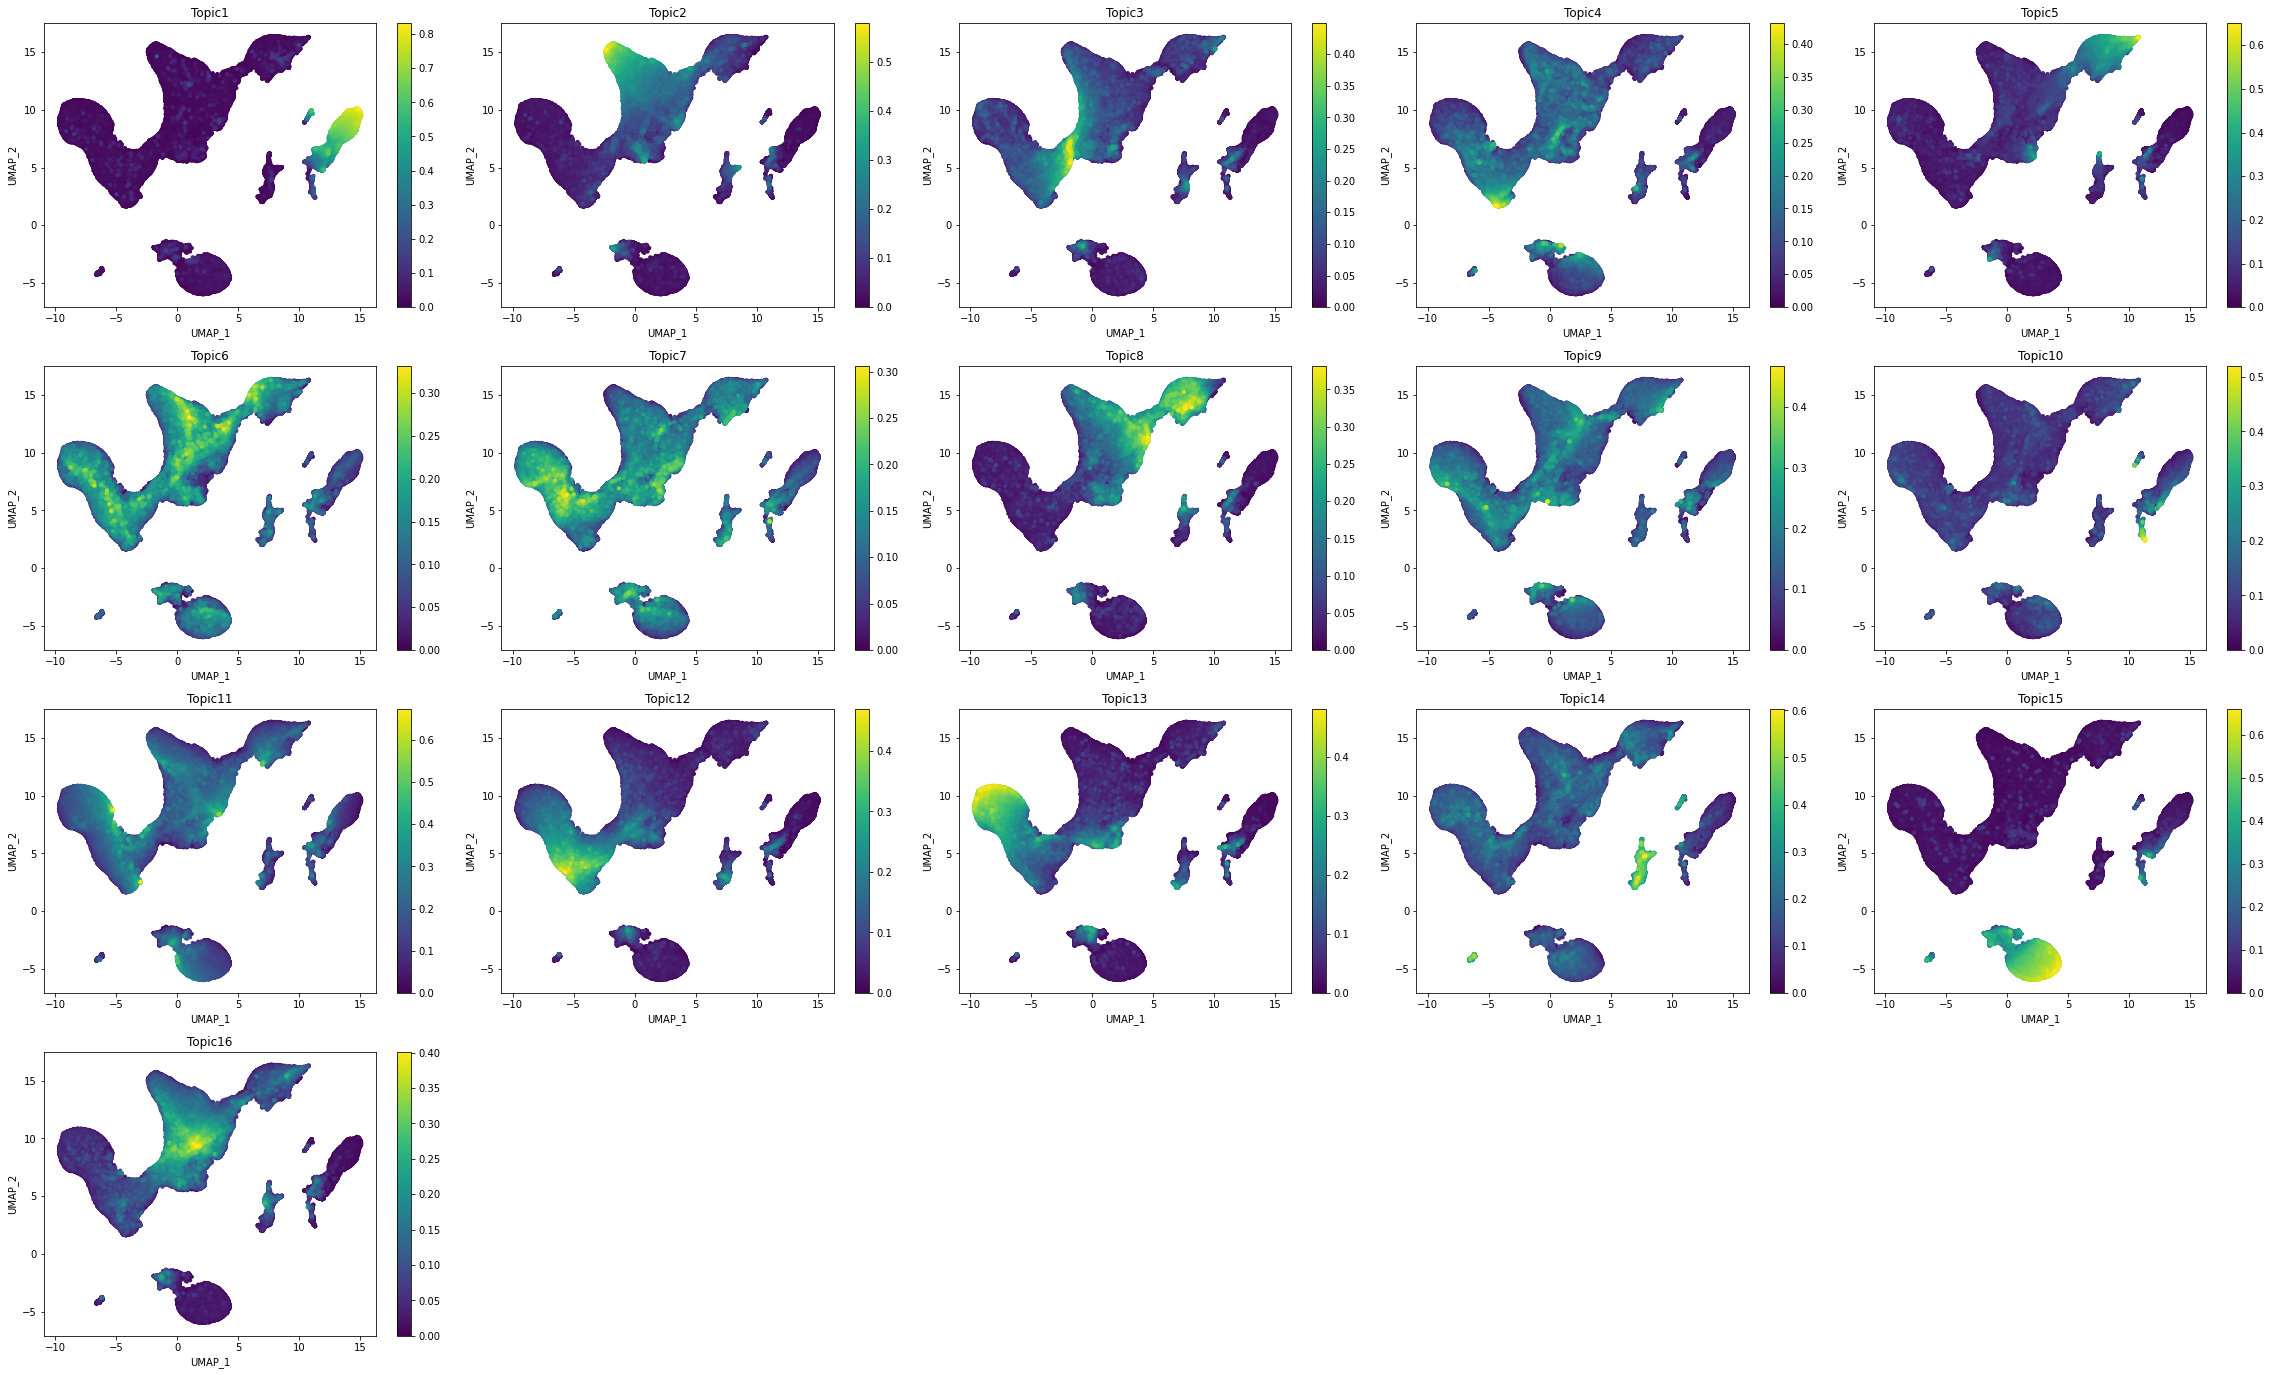

In [41]:
plot_topic(cistopic_obj_sub,
            reduction_name = 'UMAP',
            target = 'cell',
            num_columns=5,
            save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.23.dimensionality_reduction_topic_uncorrected.pdf')

In [9]:
# Harmony
harmony(cistopic_obj_sub, 'sample_id', random_state=555)
# UMAP
run_umap(cistopic_obj_sub, reduction_name='harmony_UMAP',
                 target  = 'cell', harmony=True)
pickle.dump(cistopic_obj_sub,
            open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.24.sub_cistopic_obj_harmony.pkl', 'wb'))

2023-02-24 19:55:44,683 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


2023-02-24 19:55:44,683 harmonypy    INFO     Computing initial centroids with sklearn.KMeans...


2023-02-24 19:56:10,046 - harmonypy - INFO - sklearn.KMeans initialization complete.


2023-02-24 19:56:10,046 harmonypy    INFO     sklearn.KMeans initialization complete.


2023-02-24 19:56:10,904 - harmonypy - INFO - Iteration 1 of 10


2023-02-24 19:56:10,904 harmonypy    INFO     Iteration 1 of 10


2023-02-24 19:57:34,440 - harmonypy - INFO - Iteration 2 of 10


2023-02-24 19:57:34,440 harmonypy    INFO     Iteration 2 of 10


2023-02-24 19:58:55,860 - harmonypy - INFO - Iteration 3 of 10


2023-02-24 19:58:55,860 harmonypy    INFO     Iteration 3 of 10


2023-02-24 20:00:21,044 - harmonypy - INFO - Iteration 4 of 10


2023-02-24 20:00:21,044 harmonypy    INFO     Iteration 4 of 10


2023-02-24 20:02:08,119 - harmonypy - INFO - Iteration 5 of 10


2023-02-24 20:02:08,119 harmonypy    INFO     Iteration 5 of 10


2023-02-24 20:03:53,938 - harmonypy - INFO - Iteration 6 of 10


2023-02-24 20:03:53,938 harmonypy    INFO     Iteration 6 of 10


2023-02-24 20:05:15,485 - harmonypy - INFO - Iteration 7 of 10


2023-02-24 20:05:15,485 harmonypy    INFO     Iteration 7 of 10


2023-02-24 20:06:38,707 - harmonypy - INFO - Iteration 8 of 10


2023-02-24 20:06:38,707 harmonypy    INFO     Iteration 8 of 10


2023-02-24 20:08:01,505 - harmonypy - INFO - Iteration 9 of 10


2023-02-24 20:08:01,505 harmonypy    INFO     Iteration 9 of 10


2023-02-24 20:09:25,421 - harmonypy - INFO - Iteration 10 of 10


2023-02-24 20:09:25,421 harmonypy    INFO     Iteration 10 of 10


2023-02-24 20:10:48,301 - harmonypy - INFO - Stopped before convergence


2023-02-24 20:10:48,301 harmonypy    INFO     Stopped before convergence
2023-02-24 20:10:48,333 cisTopic     INFO     Running UMAP


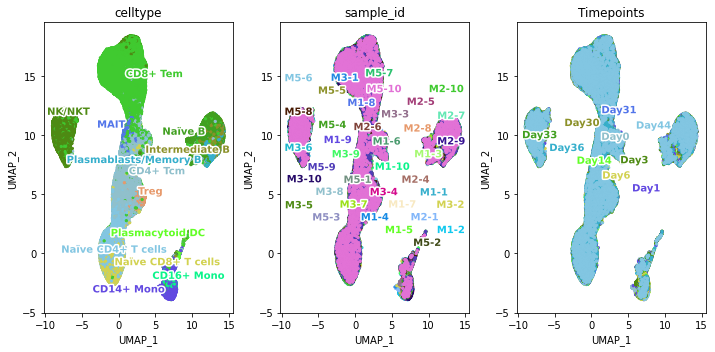

In [45]:
plot_metadata(cistopic_obj_sub,
                reduction_name='harmony_UMAP',
                 variables=['celltype', 'sample_id','Timepoints'],
                 target='cell', num_columns=3,
                 text_size=10,
                 dot_size=5,
                 figsize=(10,5),
                 save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.24.dimensionality_reduction_label_corrected.pdf')

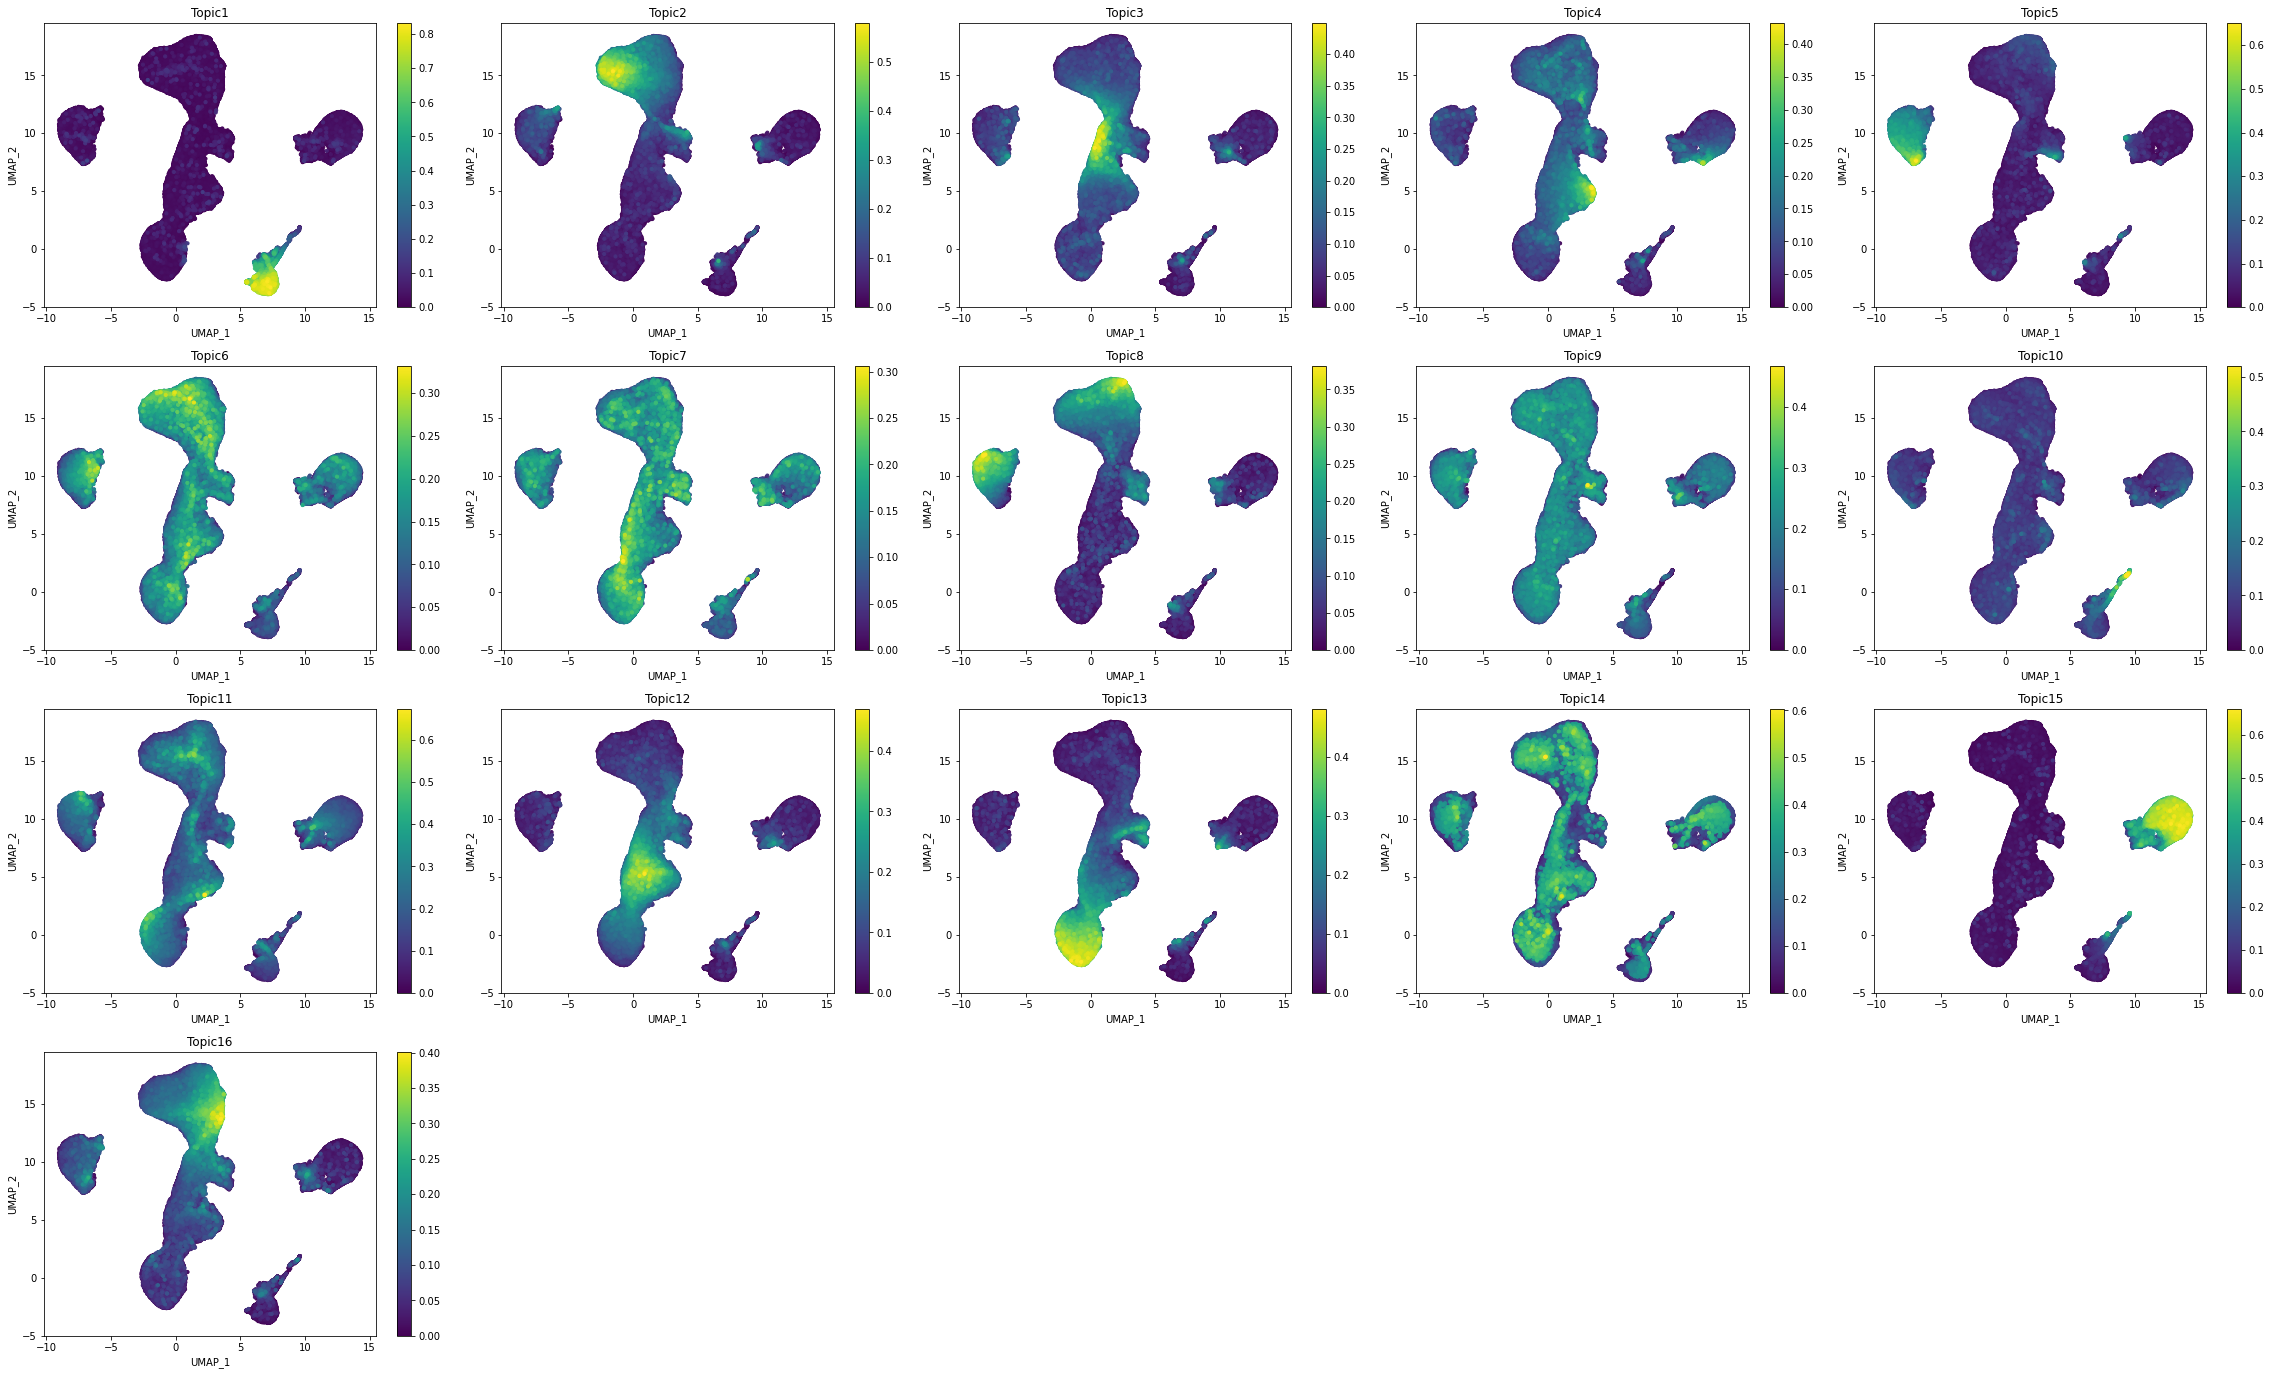

In [46]:
plot_topic(cistopic_obj_sub,
            reduction_name = 'harmony_UMAP',
            target = 'cell',
            num_columns=5,
            save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.24.dimensionality_reduction_topic_corrected.pdf')

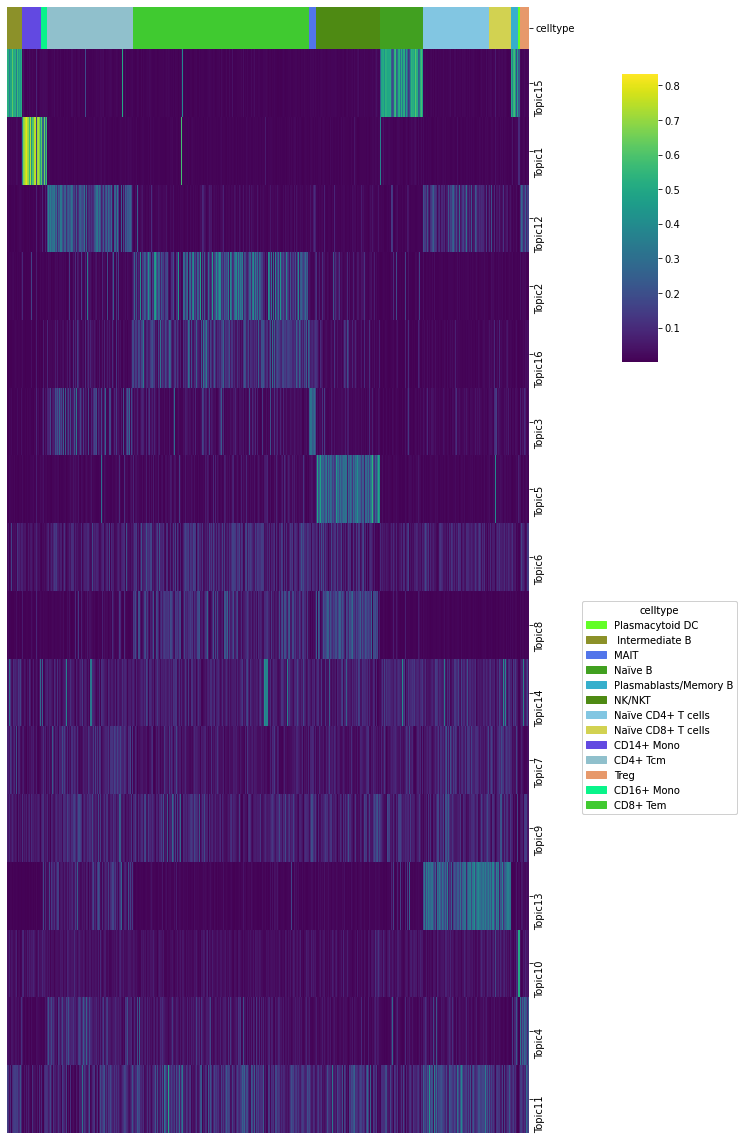

In [47]:
from pycisTopic.clust_vis import *
cell_topic_heatmap(cistopic_obj_sub,
                     variables = ['celltype'],
                     scale = False,
                     legend_loc_x = 1.05,
                     legend_loc_y = -1.2,
                     legend_dist_y = -1,
                     figsize=(10,20),
                     save = '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.24.sub.heatmap_topic_contr.pdf')

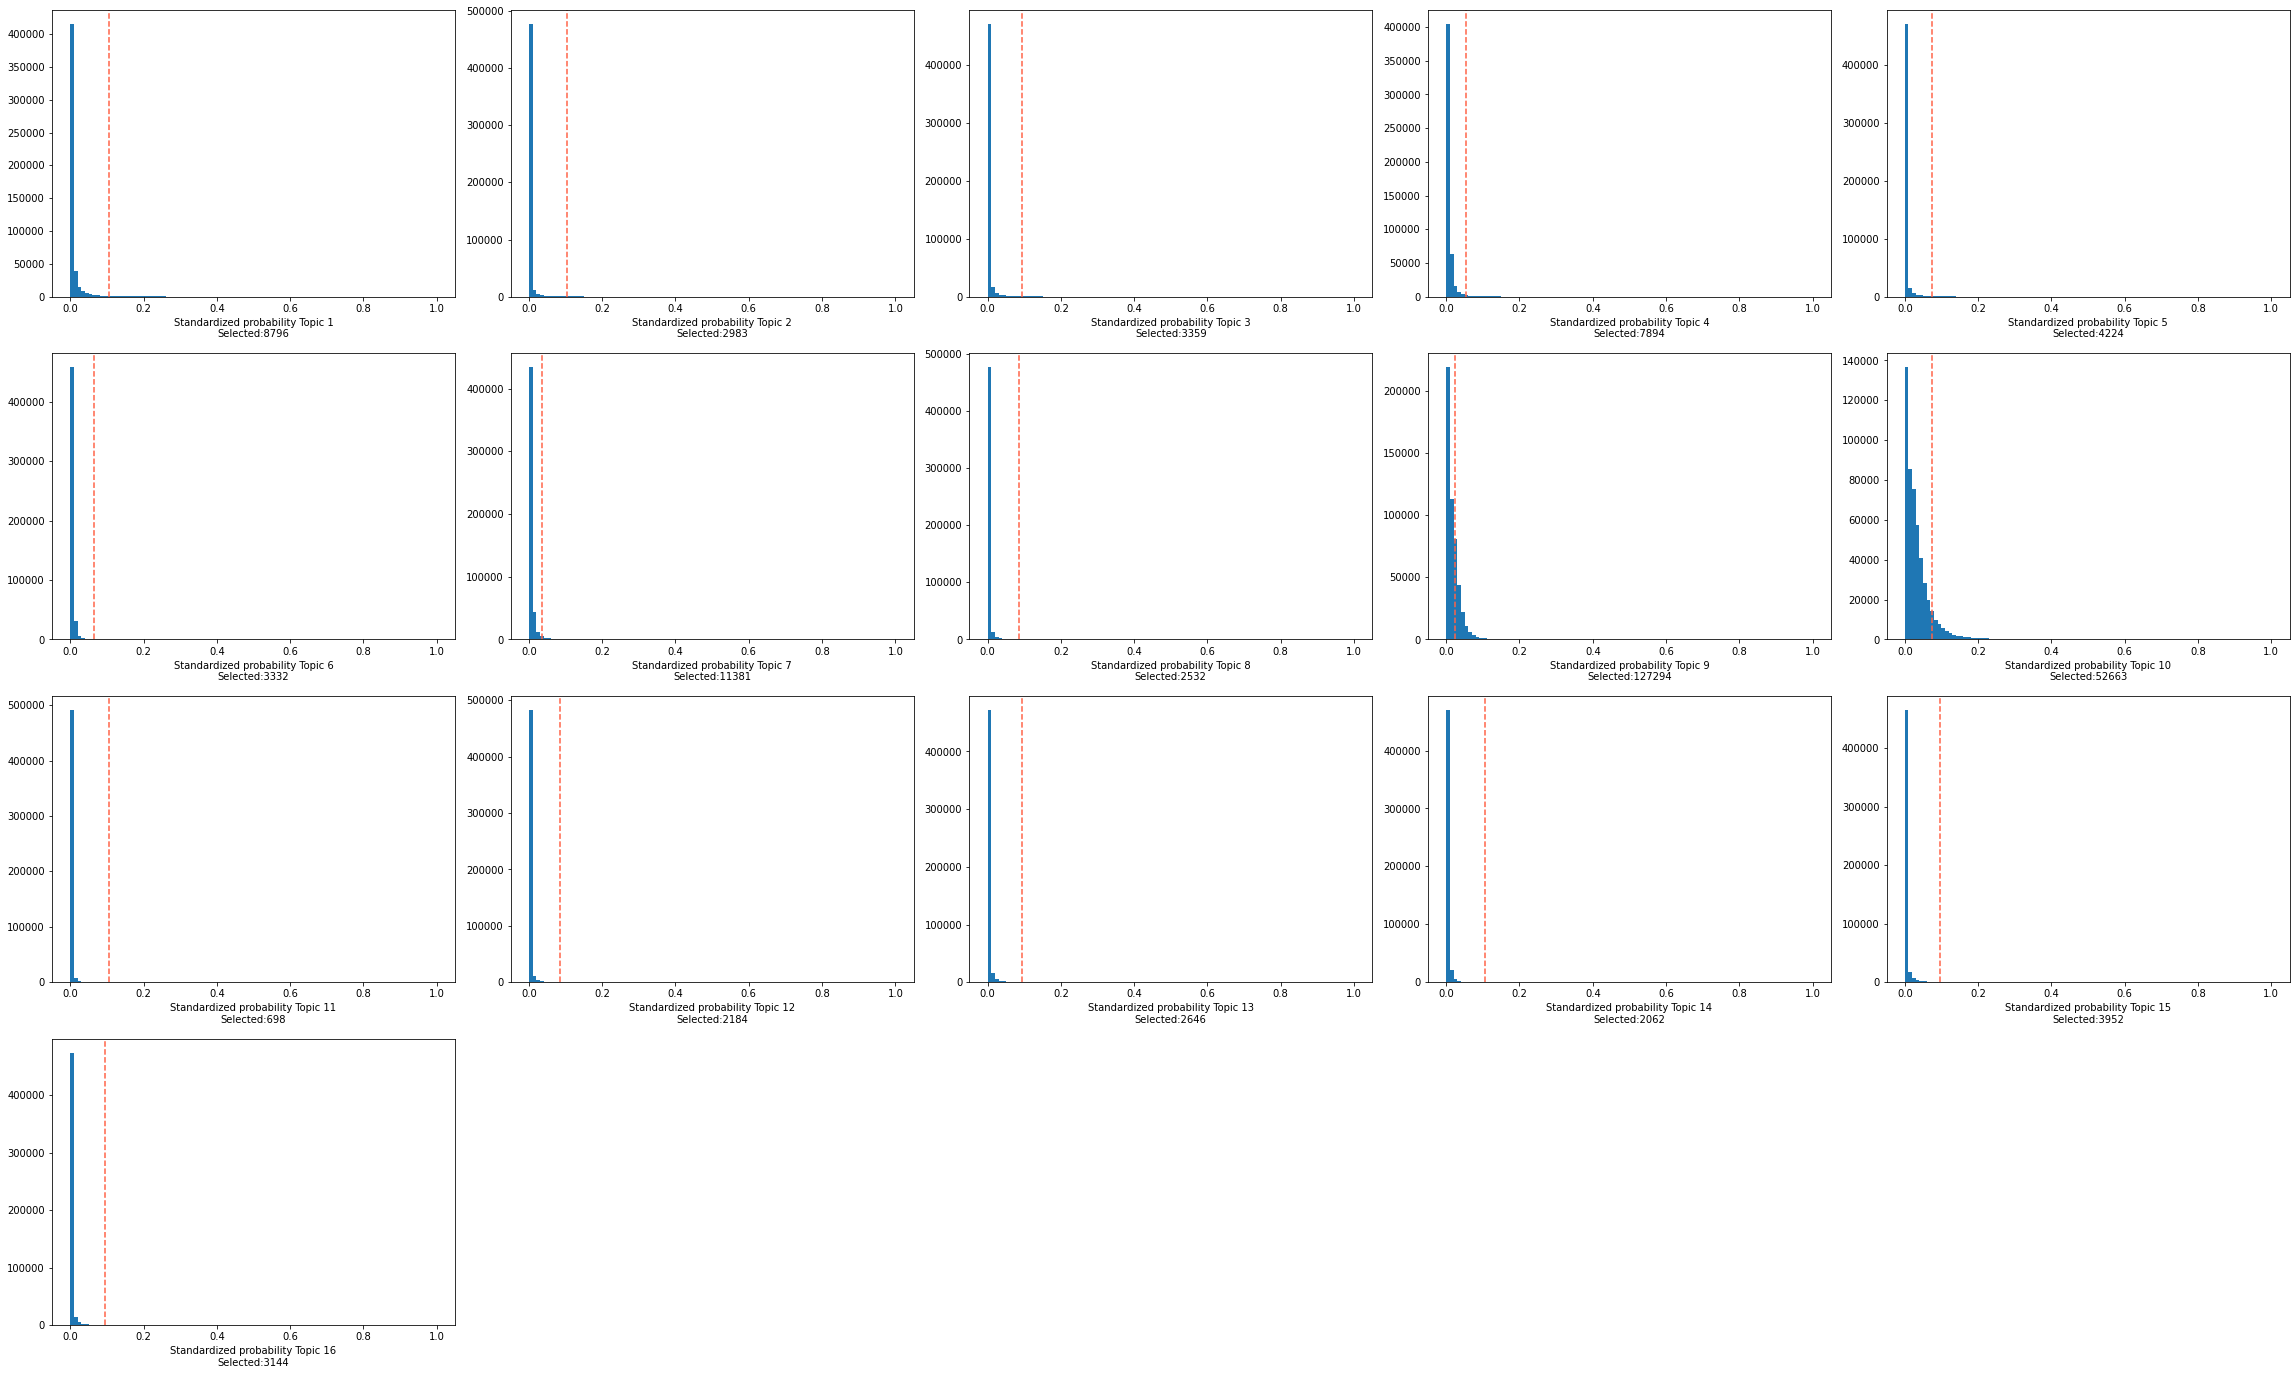

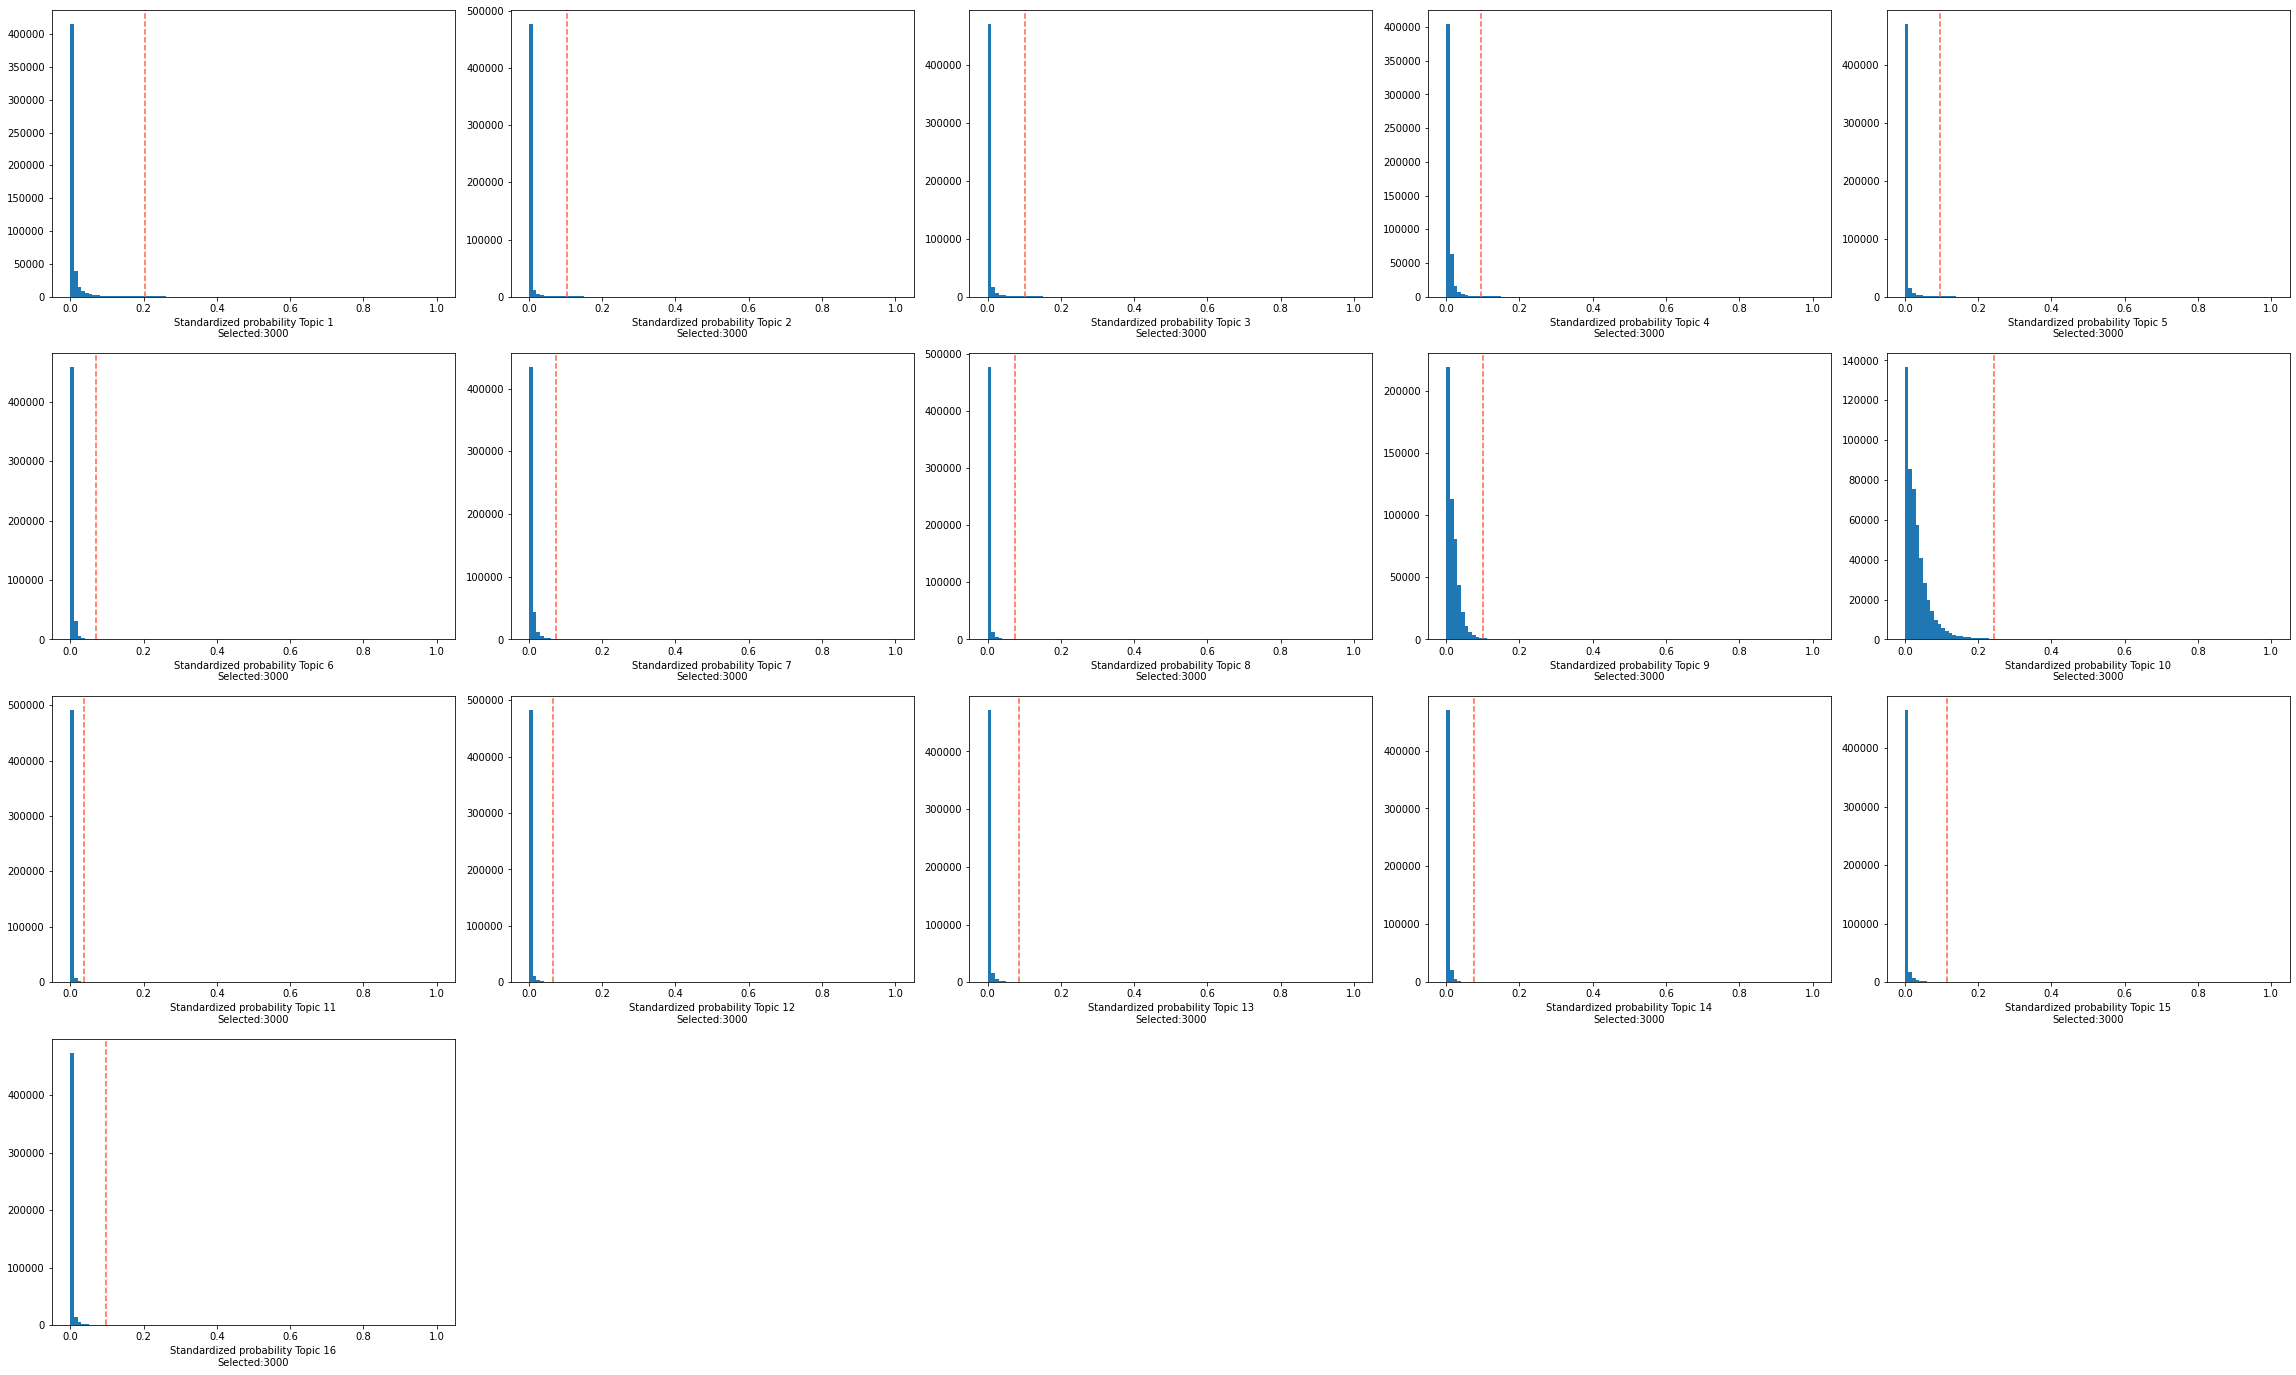

FileNotFoundError: [Errno 2] No such file or directory: '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/candidate_enhancers/region_bin_topics_otsu.pkl'

In [58]:
cistopic_obj_sub = pickle.load(open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.24.sub_cistopic_obj_harmony.pkl', 'rb'))
from pycisTopic.topic_binarization import *
region_bin_topics_otsu = binarize_topics(cistopic_obj_sub, method='otsu', plot=True, num_columns=5, save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/3.1.otsu.pdf')
region_bin_topics_top3k = binarize_topics(cistopic_obj_sub, method='ntop', ntop = 3000,plot=True, num_columns=5, save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/3.1.ntop.pdf')



In [1]:
import pickle
cistopic_obj_sub = pickle.load(open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.24.sub_cistopic_obj_harmony.pkl', 'rb'))
print(cistopic_obj_sub)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 232486 × 505139


In [2]:
model = cistopic_obj_sub.selected_model
cell_names = cistopic_obj_sub.cell_names
cell_topic = model.cell_topic.loc[:, cell_names]
cell_topic
region_names = cistopic_obj_sub.region_names
topic_region = model.topic_region.loc[region_names]

In [3]:
import numpy as np
import pandas as pd
cell_topic = cell_topic.to_numpy().astype(np.float32)
topic_region = topic_region.to_numpy().astype(np.float32)

In [6]:
topic_region

array([[0.0000000e+00, 3.3054044e-07, 2.9940028e-07, ..., 1.6067052e-08,
        1.0895475e-07, 3.8555382e-07],
       [0.0000000e+00, 4.8143932e-07, 1.8770096e-06, ..., 0.0000000e+00,
        0.0000000e+00, 2.0654668e-06],
       [5.4431516e-06, 2.8742646e-08, 0.0000000e+00, ..., 0.0000000e+00,
        1.1673723e-07, 1.0097838e-07],
       ...,
       [0.0000000e+00, 0.0000000e+00, 2.3030791e-08, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.1387629e-08, 7.1856614e-09, 0.0000000e+00, ..., 0.0000000e+00,
        3.1129929e-08, 9.1798524e-09],
       [6.4162890e-08, 0.0000000e+00, 4.6061583e-08, ..., 0.0000000e+00,
        6.2259858e-08, 2.7539558e-08]], dtype=float32)

In [6]:
cell_topic


array([[0.01133262, 0.00702777, 0.02090772, ..., 0.01787305, 0.00511119,
        0.00304726],
       [0.0436976 , 0.02428542, 0.01184427, ..., 0.01787305, 0.01300215,
        0.00553483],
       [0.0288799 , 0.03830727, 0.00882313, ..., 0.01297327, 0.02304519,
        0.01100746],
       ...,
       [0.12285534, 0.08576581, 0.10659846, ..., 0.14170378, 0.06393472,
        0.1642413 ],
       [0.01152759, 0.006084  , 0.44771355, ..., 0.5002784 , 0.01443687,
        0.01050995],
       [0.12538993, 0.13079749, 0.01019637, ..., 0.00673719, 0.02017575,
        0.00702736]], dtype=float32)

In [9]:
type(cell_topic)
cell_topic.shape

(16, 232486)

In [4]:
df1=topic_region.head(3)
df2=cell_topic.iloc[:,0:3]
print(df1)
print(df2)

import numpy as np
import pandas as pd
df2 = df2.to_numpy().astype(np.float32)
df1 = df1.to_numpy().astype(np.float32)

                            Topic1        Topic2        Topic3        Topic4  \
chr20:63663266-63663766   0.000000  3.305404e-07  2.994003e-07  2.920296e-07   
chr6:44931924-44932424    0.000000  4.814393e-07  1.877010e-06  1.261985e-06   
chr3:174417521-174418021  0.000005  2.874265e-08  0.000000e+00  0.000000e+00   

                                Topic5        Topic6        Topic7  \
chr20:63663266-63663766   2.728714e-07  1.237007e-07  1.080386e-07   
chr6:44931924-44932424    9.865350e-07  0.000000e+00  0.000000e+00   
chr3:174417521-174418021  0.000000e+00  0.000000e+00  4.155332e-08   

                                Topic8    Topic9       Topic10       Topic11  \
chr20:63663266-63663766   8.762454e-09  0.000002  1.384433e-06  6.436130e-07   
chr6:44931924-44932424    8.762454e-09  0.000001  1.318508e-08  1.787814e-08   
chr3:174417521-174418021  9.638699e-08  0.000000  2.241463e-07  0.000000e+00   

                               Topic12   Topic13       Topic14       Topic15 

In [7]:
imputed_acc_test = df1@ df2
print(imputed_acc_test)
imputed_acc_numpy = imputed_acc_test.astype(np.float32)
imputed_acc_numpy

[[3.4119213e-07 4.4040038e-07 3.3636798e-07]
 [5.3742423e-07 7.8942031e-07 2.2471765e-07]
 [9.6899605e-08 6.3442130e-08 1.7519724e-07]]


array([[3.4119213e-07, 4.4040038e-07, 3.3636798e-07],
       [5.3742423e-07, 7.8942031e-07, 2.2471765e-07],
       [9.6899605e-08, 6.3442130e-08, 1.7519724e-07]], dtype=float32)

In [14]:
print(np.matmul(df1, df2))

[[3.4119213e-07 4.4040038e-07 3.3636798e-07]
 [5.3742423e-07 7.8942031e-07 2.2471765e-07]
 [9.6899605e-08 6.3442130e-08 1.7519724e-07]]


In [15]:
print(np.dot(df1, df2))

[[3.4119213e-07 4.4040038e-07 3.3636798e-07]
 [5.3742423e-07 7.8942031e-07 2.2471765e-07]
 [9.6899605e-08 6.3442130e-08 1.7519724e-07]]


In [17]:
type(imputed_acc)

numpy.ndarray

In [18]:
type(np.dot(df1, df2))

numpy.ndarray

In [31]:
df = pd.DataFrame(data=np.dot(df1, df2)[0:,0:],columns=df2.columns,index=df1.index)
df

,AGTGTTTCATAGCAGG-1_M1-1___M1-1,ACCTGGATCTAGCTTT-1_M1-1___M1-1,TAAGCTGGTAAATTGC-1_M1-1___M1-1
chr20:63663266-63663766,3.411922e-07,4.404004e-07,3.363680e-07
chr6:44931924-44932424,5.374242e-07,7.894203e-07,2.247176e-07
chr3:174417521-174418021,9.689961e-08,6.344213e-08,1.751973e-07


In [ ]:
 imputed_acc = print(np.mat(topic_region) * np.mat(cell_topic))

In [19]:
print(np.mat(df1) * np.mat(df2))

[[3.4119213e-07 4.4040038e-07 3.3636798e-07]
 [5.3742423e-07 7.8942031e-07 2.2471765e-07]
 [9.6899605e-08 6.3442130e-08 1.7519724e-07]]


In [ ]:
A=topic_region
B=cell_topic

C = np.array([[sum(a*b for a,b in zip(A_row, B_col)) for B_col in zip(*B)] 
    for A_row in A])
C

In [5]:
import torch

In [7]:
！pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

SyntaxError: invalid character in identifier (24976941.py, line 1)

In [8]:
! pip install matplotlib

Looking in indexes: https://mirrors.bfsu.edu.cn/pypi/web/simple

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [9]:
! pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://mirrors.bfsu.edu.cn/pypi/web/simple, https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 MB 5.4 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 6.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [4]:
import torch

In [6]:
topic_region_torch = torch.from_numpy(topic_region)

In [7]:
cell_topic_torch = torch.from_numpy(cell_topic)
cell_topic_torch

tensor([[0.0113, 0.0070, 0.0209,  ..., 0.0179, 0.0051, 0.0030],
        [0.0437, 0.0243, 0.0118,  ..., 0.0179, 0.0130, 0.0055],
        [0.0289, 0.0383, 0.0088,  ..., 0.0130, 0.0230, 0.0110],
        ...,
        [0.1229, 0.0858, 0.1066,  ..., 0.1417, 0.0639, 0.1642],
        [0.0115, 0.0061, 0.4477,  ..., 0.5003, 0.0144, 0.0105],
        [0.1254, 0.1308, 0.0102,  ..., 0.0067, 0.0202, 0.0070]])

In [8]:
imputed_acc_torch=torch.mm(topic_region_torch, cell_topic_torch)

In [9]:
imputed_acc=imputed_acc_torch.numpy()

In [10]:
imputed_acc

array([[3.41192134e-07, 4.40400385e-07, 3.36367975e-07, ...,
        2.11068667e-07, 4.30310081e-07, 3.30327680e-07],
       [5.37424228e-07, 7.89420255e-07, 2.24717652e-07, ...,
        1.76832529e-07, 1.01904698e-06, 5.59995499e-07],
       [9.68996048e-08, 6.34421298e-08, 1.75197258e-07, ...,
        1.62437146e-07, 4.63735752e-08, 2.79670065e-08],
       ...,
       [5.27817834e-09, 1.06772475e-08, 9.12966946e-09, ...,
        6.96842761e-09, 1.82728943e-08, 5.74792569e-09],
       [1.26883553e-08, 1.92202023e-08, 3.16325135e-08, ...,
        3.02189100e-08, 3.23300497e-08, 9.82168391e-09],
       [2.64911595e-08, 3.52087675e-08, 4.97636883e-08, ...,
        4.76186806e-08, 3.31666712e-08, 2.23777157e-08]], dtype=float32)

In [11]:
scale_factor=10**6
sparsity_thr= 0.67
project= "cisTopic_Impute"

In [12]:
print("Scaling")
# Only multiply non-zero data of sparse matrix.
imputed_acc *= np.int32(scale_factor)


Scaling


In [13]:
imputed_acc.ndim
imputed_acc.shape

(505139, 232486)

In [14]:
pickle.dump(imputed_acc,
            open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/3.1.imputed_acc.pkl', 'wb'))

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ray
import scipy
import scipy.sparse as sparse
import sklearn
from numpy import array, count_nonzero
from scipy.stats import ranksums
from sklearn.preprocessing import normalize

In [32]:
#imputed_acc = imputed_acc.astype(np.int32)
print("Keep non zero rows")
keep_regions_index = non_zero_rows(imputed_acc)
print(type(keep_regions_index))
keep_regions_index

Keep non zero rows
<class 'numpy.ndarray'>


array([     0,      1,      2, ..., 505136, 505137, 505138])

In [34]:
keep_regions_index.size

505139

In [33]:
 region_names = subset_list(region_names, keep_regions_index)

numpy.ndarray

In [31]:
keep_regions_index = non_zero_rows(newarr[0])
print(type(keep_regions_index))
keep_regions_index

<class 'numpy.ndarray'>


array([   0,    1,    2, ..., 5049, 5050, 5051])

In [ ]:
imputed_acc=np.load('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.28.imputed_acc.npy')

In [36]:
sparsity = 1.0 - (count_nonzero(imputed_acc) / float(imputed_acc.size))
sparsity

0.0

In [16]:
from pycisTopic.diff_features import *

In [17]:
 imputed_acc_obj = CistopicImputedFeatures(imputed_acc, region_names, cell_names, project)

In [18]:
type(imputed_acc_obj)

pycisTopic.diff_features.CistopicImputedFeatures

In [58]:
print(imputed_acc_obj)

CistopicImputedFeatures from project cisTopic_Impute with nCells × nFeatures = 232486 × 505139


In [19]:
imputed_acc_obj.cell_names

['AGTGTTTCATAGCAGG-1_M1-1___M1-1',
 'ACCTGGATCTAGCTTT-1_M1-1___M1-1',
 'TAAGCTGGTAAATTGC-1_M1-1___M1-1',
 'GGTGATTTCGATTTGA-1_M1-1___M1-1',
 'CCTAGTTGTCATGCAA-1_M1-1___M1-1',
 'TCGCGCACACTTACAG-1_M1-1___M1-1',
 'TAGCATATCCTAATAG-1_M1-1___M1-1',
 'AGTTACATCGGGATTT-1_M1-1___M1-1',
 'AGAATCTGTTCACTGT-1_M1-1___M1-1',
 'ACTCGCGCAAATACCT-1_M1-1___M1-1',
 'TTAAAGGCACCTGCTC-1_M1-1___M1-1',
 'TACCGTTGTTATTGCC-1_M1-1___M1-1',
 'CAAGTAACATGACTAT-1_M1-1___M1-1',
 'GTTACAGGTCTATCGT-1_M1-1___M1-1',
 'TCTAGCACATAGACTT-1_M1-1___M1-1',
 'GTTGGCCAGACTTACA-1_M1-1___M1-1',
 'CACTTAAAGTGAGCAA-1_M1-1___M1-1',
 'ACTTGAATCCCTCAGT-1_M1-1___M1-1',
 'GGCCTTAAGATAGACG-1_M1-1___M1-1',
 'TTTCTTGCAATGAAGC-1_M1-1___M1-1',
 'ATGACTCAGAGAAGGG-1_M1-1___M1-1',
 'GGTCCATCATGTCGCG-1_M1-1___M1-1',
 'AGGAACCAGTCTCACC-1_M1-1___M1-1',
 'GACCTCAAGCTAATCA-1_M1-1___M1-1',
 'TATTTGGAGGTTAGAG-1_M1-1___M1-1',
 'GGAGGTTAGGAGTCTT-1_M1-1___M1-1',
 'ACAGGTAAGCTTACTT-1_M1-1___M1-1',
 'GGATACTTCTAGCGAT-1_M1-1___M1-1',
 'GTTCTCATCTTGTCTG-1

In [20]:
import pickle
cistopic_obj = pickle.load(open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/2.18.cistopic_obj.pkl', 'rb'))
metadf=cistopic_obj.cell_data
cleandf=metadf[metadf["id"].notna()]
cleandf

,Unique_nr_frag_in_regions,Log_unique_nr_frag,Dupl_rate,cisTopic_log_nr_frag,Total_nr_frag,cisTopic_nr_acc,cisTopic_nr_frag,Unique_nr_frag,FRIP,TSS_enrichment,...,nCount_peaks,nFeature_peaks,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,peaks_snn_res.0.8,sample_id,barcode,id,idbarcode.1
AGTGTTTCATAGCAGG-1_M1-1___M1-1,4951,3.873204,0.173711,3.745465,9038,5079,5565,7468,0.662962,9.725911,...,5437.0,4643.0,3362.0,1077.0,0.0,23.0,M1-1,AGTGTTTCATAGCAGG-1,AGTGTTTCATAGCAGG-1_M1-1,AGTGTTTCATAGCAGG-1_M1-1___M1-1
ACCTGGATCTAGCTTT-1_M1-1___M1-1,7756,4.040919,0.156715,3.927165,13030,7367,8456,10988,0.705861,10.762919,...,8127.0,6470.0,4333.0,2241.0,14.0,10.0,M1-1,ACCTGGATCTAGCTTT-1,ACCTGGATCTAGCTTT-1_M1-1,ACCTGGATCTAGCTTT-1_M1-1___M1-1
TAAGCTGGTAAATTGC-1_M1-1___M1-1,3063,3.708166,0.178543,3.579097,6217,3591,3794,5107,0.599765,9.417302,...,3669.0,3319.0,4405.0,2274.0,34.0,6.0,M1-1,TAAGCTGGTAAATTGC-1,TAAGCTGGTAAATTGC-1_M1-1,TAAGCTGGTAAATTGC-1_M1-1___M1-1
GGTGATTTCGATTTGA-1_M1-1___M1-1,4238,3.849726,0.176560,3.718751,8592,4875,5233,7075,0.599011,10.071061,...,5032.0,4406.0,3475.0,1149.0,9.0,2.0,M1-1,GGTGATTTCGATTTGA-1,GGTGATTTCGATTTGA-1_M1-1,GGTGATTTCGATTTGA-1_M1-1___M1-1
CCTAGTTGTCATGCAA-1_M1-1___M1-1,3898,3.768712,0.166288,3.654177,7042,4205,4510,5871,0.663941,10.301659,...,4400.0,3920.0,4448.0,2271.0,8.0,6.0,M1-1,CCTAGTTGTCATGCAA-1,CCTAGTTGTCATGCAA-1_M1-1,CCTAGTTGTCATGCAA-1_M1-1___M1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAAAGGCATGTGGGA-1_M5-10___M5-10,1698,3.519171,0.267346,3.400711,4511,2401,2516,3305,0.513767,10.213923,...,2402.0,2222.0,2929.0,983.0,1.0,5.0,M5-10,TTAAAGGCATGTGGGA-1,TTAAAGGCATGTGGGA-1_M5-10,TTAAAGGCATGTGGGA-1_M5-10___M5-10
TGATTAGTCTTAGGAC-1_M5-10___M5-10,1467,3.469233,0.250953,3.343212,3933,2123,2204,2946,0.497963,11.391131,...,2122.0,1990.0,3504.0,1437.0,2.0,0.0,M5-10,TGATTAGTCTTAGGAC-1,TGATTAGTCTTAGGAC-1_M5-10,TGATTAGTCTTAGGAC-1_M5-10___M5-10
GTCTAACAGTTGTCTT-1_M5-10___M5-10,1607,3.445915,0.260201,3.356026,3774,2195,2270,2792,0.575573,12.358410,...,2257.0,2128.0,3470.0,1137.0,4.0,1.0,M5-10,GTCTAACAGTTGTCTT-1,GTCTAACAGTTGTCTT-1_M5-10,GTCTAACAGTTGTCTT-1_M5-10___M5-10
TGCGCAGGTTTGCGCC-1_M5-10___M5-10,915,3.302764,0.259587,3.143639,2712,1344,1392,2008,0.455677,10.082813,...,1341.0,1271.0,3037.0,987.0,14.0,0.0,M5-10,TGCGCAGGTTTGCGCC-1,TGCGCAGGTTTGCGCC-1_M5-10,TGCGCAGGTTTGCGCC-1_M5-10___M5-10


In [29]:
cleandf
day0 = ['M1-1', 'M2-1', 'M3-1','M5-1']
day0_df=cleandf[cleandf['sample_id'].isin(day0)]
day0_df['sample_id'].value_counts()

M1-1    5688
M5-1    4253
M2-1    4017
M3-1    3436
Name: sample_id, dtype: int64

In [31]:
day0_cellname=day0_df['idbarcode.1'].values.tolist()
imputed_acc_obj_day0 = imputed_acc_obj.subset(cells=day0_cellname,copy=True)

In [32]:
print(imputed_acc_obj_day0)

CistopicImputedFeatures from project cisTopic_Impute with nCells × nFeatures = 17394 × 505139


In [33]:
normalized_imputed_acc_obj_day0 = normalize_scores(imputed_acc_obj_day0, scale_factor=10**4)

2023-03-01 13:30:49,770 cisTopic     INFO     Normalizing imputed data
2023-03-01 13:32:09,347 cisTopic     INFO     Done!


2023-03-01 13:43:32,166 cisTopic     INFO     Calculating mean
2023-03-01 13:43:34,574 cisTopic     INFO     Calculating variance


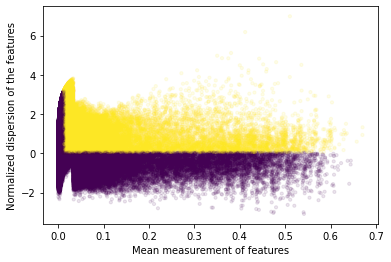

2023-03-01 13:44:30,352 cisTopic     INFO     Done!


In [34]:
variable_regions_day0 = find_highly_variable_features(normalized_imputed_acc_obj_day0,
                                           min_disp = 0.05,
                                           min_mean = 0.0125,
                                           max_mean = 3,
                                           max_disp = np.inf,
                                           n_bins=20,
                                           n_top_features=None,
                                           plot=True,
                                           save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/3.1.day0.HVR_plot.pdf')

In [35]:
markers_dict_day0= find_diff_features(cistopic_obj,
                      imputed_acc_obj_day0,
                      variable='celltype',
                      var_features=variable_regions_day0,
                      contrasts=None,
                      adjpval_thr=0.05,
                      log2fc_thr=np.log2(1.5),
                      n_cpu=2)

2023-03-01 13:51:54,635	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(markers_ray pid=404867) 2023-03-01 13:51:57,994 cisTopic     INFO     Formatting data for  Intermediate B
(markers_ray pid=404866) 2023-03-01 13:51:59,253 cisTopic     INFO     Formatting data for CD14+ Mono
(markers_ray pid=404866) 2023-03-01 13:52:18,283 cisTopic     INFO     Computing p-value for CD14+ Mono
(markers_ray pid=404867) 2023-03-01 13:52:22,532 cisTopic     INFO     Computing p-value for  Intermediate B
(markers_ray pid=404866) 2023-03-01 13:54:20,681 cisTopic     INFO     Computing log2FC for CD14+ Mono
(markers_ray pid=404866) 2023-03-01 13:54:22,259 cisTopic     INFO     CD14+ Mono done!
(markers_ray pid=404866) 2023-03-01 13:54:22,339 cisTopic     INFO     Formatting data for CD16+ Mono
(markers_ray pid=404867) 2023-03-01 13:54:25,283 cisTopic     INFO     Computing log2FC for  Intermediate B
(markers_ray pid=404867) 2023-03-01 13:54:26,885 cisTopic     INFO      Intermediate B done!
(markers_ray pid=404867) 2023-03-01 13:54:26,964 cisTopic     INFO     Formatting da

In [36]:
markers_dict_day0

{' Intermediate B':                              Log2FC Adjusted_pval         Contrast
 chr14:95713937-95714437    3.164443           0.0   Intermediate B
 chr14:95725891-95726391    3.164443           0.0   Intermediate B
 chr18:32884482-32884982    3.164443           0.0   Intermediate B
 chr14:105817918-105818418  3.164443           0.0   Intermediate B
 chr6:88141719-88142219     3.164442           0.0   Intermediate B
 ...                             ...           ...              ...
 chr1:2091552-2092052       0.586125           0.0   Intermediate B
 chr8:141035258-141035758   0.585819           0.0   Intermediate B
 chr2:68417854-68418354      0.58568           0.0   Intermediate B
 chr10:58282542-58283042    0.585382           0.0   Intermediate B
 chr18:76620215-76620715    0.585083           0.0   Intermediate B
 
 [13736 rows x 3 columns],
 'CD14+ Mono':                             Log2FC Adjusted_pval    Contrast
 chr1:59674465-59674965    4.509985           0.0  CD14+ Mon

CistopicImputedFeatures from project cisTopic_Impute with nCells × nFeatures = 17284 × 505139
2023-03-01 17:27:57,252 cisTopic     INFO     Normalizing imputed data
2023-03-01 17:30:18,593 cisTopic     INFO     Done!
2023-03-01 17:30:18,597 cisTopic     INFO     Calculating mean
2023-03-01 17:30:20,955 cisTopic     INFO     Calculating variance


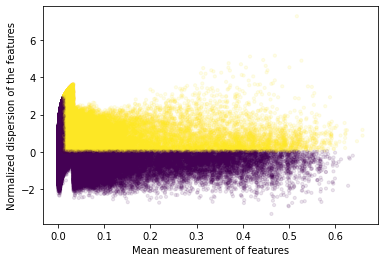

2023-03-01 17:31:18,152 cisTopic     INFO     Done!


2023-03-01 17:34:24,612	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(markers_ray pid=412549) 2023-03-01 17:34:28,524 cisTopic     INFO     Formatting data for  Intermediate B
(markers_ray pid=412552) 2023-03-01 17:34:30,568 cisTopic     INFO     Formatting data for CD14+ Mono
(markers_ray pid=412553) 2023-03-01 17:34:32,596 cisTopic     INFO     Formatting data for CD16+ Mono
(markers_ray pid=412551) 2023-03-01 17:34:34,581 cisTopic     INFO     Formatting data for CD4+ Tcm
(markers_ray pid=412550) 2023-03-01 17:34:36,604 cisTopic     INFO     Formatting data for CD8+ Tem
(markers_ray pid=412549) 2023-03-01 17:34:55,666 cisTopic     INFO     Computing p-value for  Intermediate B
(markers_ray pid=412552) 2023-03-01 17:35:00,966 cisTopic     INFO     Computing p-value for CD14+ Mono
(markers_ray pid=412553) 2023-03-01 17:35:04,282 cisTopic     INFO     Computing p-value for CD16+ Mono
(markers_ray pid=412550) 2023-03-01 17:35:05,615 cisTopic     INFO     Computing p-value for CD8+ Tem
(markers_ray pid=412551) 2023-03-01 17:35:06,656 cisTopic     INFO    

In [37]:
day1 = ['M1-2', 'M2-2', 'M3-2','M5-2']
day1_df=cleandf[cleandf['sample_id'].isin(day1)]
day1_df['sample_id'].value_counts()

day1_cellname=day1_df['idbarcode.1'].values.tolist()
imputed_acc_obj_day1 = imputed_acc_obj.subset(cells=day1_cellname,copy=True)

print(imputed_acc_obj_day1)

normalized_imputed_acc_obj_day1 = normalize_scores(imputed_acc_obj_day1, scale_factor=10**4)
variable_regions_day1 = find_highly_variable_features(normalized_imputed_acc_obj_day1,
                                           min_disp = 0.05,
                                           min_mean = 0.0125,
                                           max_mean = 3,
                                           max_disp = np.inf,
                                           n_bins=20,
                                           n_top_features=None,
                                           plot=True,
                                           save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/3.1.day1.HVR_plot.pdf')
markers_dict_day1= find_diff_features(cistopic_obj,
                      imputed_acc_obj_day1,
                      variable='celltype',
                      var_features=variable_regions_day1,
                      contrasts=None,
                      adjpval_thr=0.05,
                      log2fc_thr=np.log2(1.5),
                      n_cpu=5)


CistopicImputedFeatures from project cisTopic_Impute with nCells × nFeatures = 14010 × 505139
2023-03-01 18:00:28,135 cisTopic     INFO     Normalizing imputed data
2023-03-01 18:02:50,754 cisTopic     INFO     Done!
2023-03-01 18:02:50,757 cisTopic     INFO     Calculating mean
2023-03-01 18:02:54,615 cisTopic     INFO     Calculating variance


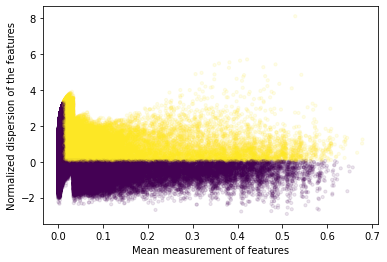

2023-03-01 18:04:05,087 cisTopic     INFO     Done!


2023-03-01 18:06:39,489	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(markers_ray pid=413546) 2023-03-01 18:06:42,523 cisTopic     INFO     Formatting data for  Intermediate B
(markers_ray pid=413547) 2023-03-01 18:06:43,028 cisTopic     INFO     Formatting data for CD14+ Mono
(markers_ray pid=413545) 2023-03-01 18:06:43,821 cisTopic     INFO     Formatting data for CD16+ Mono
(markers_ray pid=413544) 2023-03-01 18:06:44,745 cisTopic     INFO     Formatting data for CD4+ Tcm
(markers_ray pid=413543) 2023-03-01 18:06:45,534 cisTopic     INFO     Formatting data for CD8+ Tem
(markers_ray pid=413546) 2023-03-01 18:06:56,494 cisTopic     INFO     Computing p-value for  Intermediate B
(markers_ray pid=413545) 2023-03-01 18:06:58,056 cisTopic     INFO     Computing p-value for CD16+ Mono
(markers_ray pid=413547) 2023-03-01 18:06:58,456 cisTopic     INFO     Computing p-value for CD14+ Mono
(markers_ray pid=413544) 2023-03-01 18:06:58,756 cisTopic     INFO     Computing p-value for CD4+ Tcm
(markers_ray pid=413543) 2023-03-01 18:06:59,543 cisTopic     INFO    

In [38]:
day3 = ['M1-3', 'M2-3', 'M3-3','M5-3']
day3_df=cleandf[cleandf['sample_id'].isin(day3)]
day3_df['sample_id'].value_counts()

day3_cellname=day3_df['idbarcode.1'].values.tolist()
imputed_acc_obj_day3 = imputed_acc_obj.subset(cells=day3_cellname,copy=True)

print(imputed_acc_obj_day3)

normalized_imputed_acc_obj_day3 = normalize_scores(imputed_acc_obj_day3, scale_factor=10**4)
variable_regions_day3 = find_highly_variable_features(normalized_imputed_acc_obj_day3,
                                           min_disp = 0.05,
                                           min_mean = 0.0125,
                                           max_mean = 3,
                                           max_disp = np.inf,
                                           n_bins=20,
                                           n_top_features=None,
                                           plot=True,
                                           save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/3.1.day3.HVR_plot.pdf')
markers_dict_day3= find_diff_features(cistopic_obj,
                      imputed_acc_obj_day3,
                      variable='celltype',
                      var_features=variable_regions_day3,
                      contrasts=None,
                      adjpval_thr=0.05,
                      log2fc_thr=np.log2(1.5),
                      n_cpu=5)

CistopicImputedFeatures from project cisTopic_Impute with nCells × nFeatures = 27448 × 505139
2023-03-01 19:41:17,316 cisTopic     INFO     Normalizing imputed data
2023-03-01 19:43:23,218 cisTopic     INFO     Done!
2023-03-01 19:43:23,220 cisTopic     INFO     Calculating mean
2023-03-01 19:43:26,973 cisTopic     INFO     Calculating variance


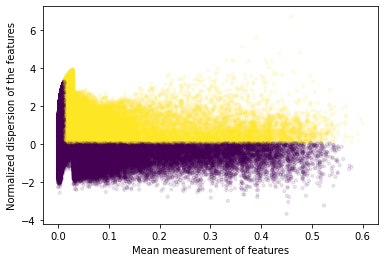

2023-03-01 19:44:30,775 cisTopic     INFO     Done!


2023-03-01 19:47:35,472	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(markers_ray pid=420569) 2023-03-01 19:47:39,585 cisTopic     INFO     Formatting data for  Intermediate B
(markers_ray pid=420567) 2023-03-01 19:47:41,772 cisTopic     INFO     Formatting data for CD14+ Mono
(markers_ray pid=420571) 2023-03-01 19:47:43,912 cisTopic     INFO     Formatting data for CD16+ Mono
(markers_ray pid=420570) 2023-03-01 19:47:46,007 cisTopic     INFO     Formatting data for CD4+ Tcm


(raylet) Spilled 6877 MiB, 2 objects, write throughput 755 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.
(raylet) Spilled 20630 MiB, 5 objects, write throughput 1083 MiB/s.
(raylet) Spilled 27508 MiB, 7 objects, write throughput 941 MiB/s.
(raylet) Spilled 34385 MiB, 9 objects, write throughput 898 MiB/s.
(raylet) Spilled 41262 MiB, 11 objects, write throughput 876 MiB/s.


(markers_ray pid=420569) 2023-03-01 19:50:04,247 cisTopic     INFO     Computing p-value for  Intermediate B
(markers_ray pid=420571) 2023-03-01 19:50:04,685 cisTopic     INFO     Computing p-value for CD16+ Mono
(markers_ray pid=420567) 2023-03-01 19:50:19,725 cisTopic     INFO     Computing p-value for CD14+ Mono
(markers_ray pid=420570) 2023-03-01 19:50:50,928 cisTopic     INFO     Computing p-value for CD4+ Tcm
(markers_ray pid=420569) 2023-03-01 19:53:19,115 cisTopic     INFO     Computing log2FC for  Intermediate B
(markers_ray pid=420571) 2023-03-01 19:53:19,203 cisTopic     INFO     Computing log2FC for CD16+ Mono
(markers_ray pid=420569) 2023-03-01 19:53:20,846 cisTopic     INFO      Intermediate B done!
(markers_ray pid=420569) 2023-03-01 19:53:20,936 cisTopic     INFO     Formatting data for CD8+ Tem
(markers_ray pid=420571) 2023-03-01 19:53:20,934 cisTopic     INFO     CD16+ Mono done!
(markers_ray pid=420571) 2023-03-01 19:53:21,038 cisTopic     INFO     Formatting data fo

(raylet) Spilled 68773 MiB, 21 objects, write throughput 760 MiB/s.


(markers_ray pid=420567) 2023-03-01 19:53:35,307 cisTopic     INFO     Computing log2FC for CD14+ Mono
(markers_ray pid=420567) 2023-03-01 19:53:37,559 cisTopic     INFO     CD14+ Mono done!
(markers_ray pid=420567) 2023-03-01 19:53:38,038 cisTopic     INFO     Formatting data for Naïve B
(markers_ray pid=420570) 2023-03-01 19:54:06,350 cisTopic     INFO     Computing log2FC for CD4+ Tcm
(markers_ray pid=420570) 2023-03-01 19:54:08,062 cisTopic     INFO     CD4+ Tcm done!
(markers_ray pid=420570) 2023-03-01 19:54:08,217 cisTopic     INFO     Formatting data for NK/NKT
(markers_ray pid=420571) 2023-03-01 19:56:16,956 cisTopic     INFO     Computing p-value for MAIT
(markers_ray pid=420569) 2023-03-01 19:56:33,469 cisTopic     INFO     Computing p-value for CD8+ Tem
(markers_ray pid=420567) 2023-03-01 19:58:06,317 cisTopic     INFO     Computing p-value for Naïve B
(markers_ray pid=420570) 2023-03-01 19:59:01,202 cisTopic     INFO     Computing p-value for NK/NKT
(markers_ray pid=420571)

In [39]:
day6 = ['M1-4', 'M2-4', 'M3-4','M5-4']
day6_df=cleandf[cleandf['sample_id'].isin(day6)]
day6_df['sample_id'].value_counts()

day6_cellname=day6_df['idbarcode.1'].values.tolist()
imputed_acc_obj_day6 = imputed_acc_obj.subset(cells=day6_cellname,copy=True)

print(imputed_acc_obj_day6)

normalized_imputed_acc_obj_day6 = normalize_scores(imputed_acc_obj_day6, scale_factor=10**4)
variable_regions_day6 = find_highly_variable_features(normalized_imputed_acc_obj_day6,
                                           min_disp = 0.05,
                                           min_mean = 0.0125,
                                           max_mean = 3,
                                           max_disp = np.inf,
                                           n_bins=20,
                                           n_top_features=None,
                                           plot=True,
                                           save= '/database/wangrong/Results/0712_ATAC+RNA/SCENIC/3.1.day6.HVR_plot.pdf')
markers_dict_day6= find_diff_features(cistopic_obj,
                      imputed_acc_obj_day6,
                      variable='celltype',
                      var_features=variable_regions_day6,
                      contrasts=None,
                      adjpval_thr=0.05,
                      log2fc_thr=np.log2(1.5),
                      n_cpu=5)

In [40]:
x = [print(x + ': '+ str(len(markers_dict_day6[x]))) for x in markers_dict_day6.keys()]

 Intermediate B: 13466
CD14+ Mono: 17243
CD16+ Mono: 16695
CD4+ Tcm: 7573
CD8+ Tem: 12413
MAIT: 5255
NK/NKT: 10571
Naïve B: 13098
Naïve CD4+ T cells: 9000
Naïve CD8+ T cells: 9047
Plasmablasts/Memory B: 13184
Plasmacytoid DC: 19463
Treg: 4919


In [41]:
x = [print(x + ': '+ str(len(markers_dict_day3[x]))) for x in markers_dict_day3.keys()]

 Intermediate B: 13856
CD14+ Mono: 14940
CD16+ Mono: 14344
CD4+ Tcm: 7630
CD8+ Tem: 10958
MAIT: 5600
NK/NKT: 10318
Naïve B: 13308
Naïve CD4+ T cells: 10055
Naïve CD8+ T cells: 10138
Plasmablasts/Memory B: 13798
Plasmacytoid DC: 18017
Treg: 4337


In [42]:
x = [print(x + ': '+ str(len(markers_dict_day1[x]))) for x in markers_dict_day1.keys()]


 Intermediate B: 15103
CD14+ Mono: 19235
CD16+ Mono: 18308
CD4+ Tcm: 8414
CD8+ Tem: 11412
MAIT: 6562
NK/NKT: 10832
Naïve B: 14244
Naïve CD4+ T cells: 10466
Naïve CD8+ T cells: 9697
Plasmablasts/Memory B: 14074
Plasmacytoid DC: 21511
Treg: 4646


In [43]:
x = [print(x + ': '+ str(len(markers_dict_day0[x]))) for x in markers_dict_day0.keys()]

 Intermediate B: 13736
CD14+ Mono: 15966
CD16+ Mono: 15440
CD4+ Tcm: 7451
CD8+ Tem: 10242
MAIT: 4976
NK/NKT: 9775
Naïve B: 12872
Naïve CD4+ T cells: 9444
Naïve CD8+ T cells: 9415
Plasmablasts/Memory B: 13244
Plasmacytoid DC: 18843
Treg: 3894


In [45]:
pickle.dump(markers_dict_day0, open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/markers_dict_day0.pkl', 'wb'))
pickle.dump(markers_dict_day1, open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/markers_dict_day1.pkl', 'wb'))
pickle.dump(markers_dict_day3, open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/markers_dict_day3.pkl', 'wb'))
pickle.dump(markers_dict_day6, open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/markers_dict_day6.pkl', 'wb'))

AttributeError: 'CistopicImputedFeatures' object has no attribute 'memory_usage'

In [56]:
del cistopic_obj 
import  gc  
gc.collect()

0

In [62]:
pickle.dump(region_bin_topics_otsu, open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/region_bin_topics_otsu.pkl', 'wb'))
pickle.dump(region_bin_topics_top3k, open('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/region_bin_topics_top3k.pkl', 'wb'))

In [63]:
region_bin_topics_otsu

{'Topic1':                              Topic1
 chr6:146543377-146543877   0.011318
 chr4:40576960-40577460     0.009781
 chr1:182149317-182149817   0.009770
 chr2:26008803-26009303     0.009679
 chr20:2301137-2301637      0.009643
 ...                             ...
 chr3:63937604-63938104     0.001174
 chr18:34709904-34710404    0.001174
 chr1:27650464-27650964     0.001174
 chr7:150586540-150587040   0.001174
 chr11:109022942-109023442  0.001174
 
 [8796 rows x 1 columns],
 'Topic2':                             Topic2
 chr12:52566828-52567328   0.017618
 chr9:126637372-126637872  0.017494
 chr4:8409464-8409964      0.016051
 chr1:184387348-184387848  0.015149
 chr1:225460626-225461126  0.014931
 ...                            ...
 chr9:89953229-89953729    0.001843
 chr14:64708550-64709050   0.001842
 chr2:8544978-8545478      0.001841
 chr11:70424053-70424553   0.001840
 chr1:91753807-91754307    0.001840
 
 [2983 rows x 1 columns],
 'Topic3':                             Topic3
 c

In [65]:
import pyranges as pr
from pycistarget.utils import region_names_to_coordinates
region_sets_day0 = {}
region_sets_day0['topics_otsu'] = {}
region_sets_day0['topics_top_3'] = {}
region_sets_day0['DARs'] = {}
for topic in region_bin_topics_otsu.keys():
    regions = region_bin_topics_otsu[topic].index[region_bin_topics_otsu[topic].index.str.startswith('chr')] #only keep regions on known chromosomes
    region_sets_day0['topics_otsu'][topic] = pr.PyRanges(region_names_to_coordinates(regions))
for topic in region_bin_topics_top3k.keys():
    regions = region_bin_topics_top3k[topic].index[region_bin_topics_top3k[topic].index.str.startswith('chr')] #only keep regions on known chromosomes
    region_sets_day0['topics_top_3'][topic] = pr.PyRanges(region_names_to_coordinates(regions))
for DAR in markers_dict_day0.keys():
    regions = markers_dict_day0[DAR].index[markers_dict_day0[DAR].index.str.startswith('chr')] #only keep regions on known chromosomes
    region_sets_day0['DARs'][DAR] = pr.PyRanges(region_names_to_coordinates(regions))
    
for key in region_sets_day0.keys():
    print(f'{key}: {region_sets_day0[key].keys()}')

topics_otsu: dict_keys(['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16'])
topics_top_3: dict_keys(['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16'])
DARs: dict_keys([' Intermediate B', 'CD14+ Mono', 'CD16+ Mono', 'CD4+ Tcm', 'CD8+ Tem', 'MAIT', 'NK/NKT', 'Naïve B', 'Naïve CD4+ T cells', 'Naïve CD8+ T cells', 'Plasmablasts/Memory B', 'Plasmacytoid DC', 'Treg'])


In [67]:
rankings_db = '/database/wangrong/Reference/feather_database/hg38_screen_v10_clust.regions_vs_motifs.rankings.feather'
scores_db =  '/database/wangrong/Reference/feather_database/hg38_screen_v10_clust.regions_vs_motifs.scores.feather'
motif_annotation = '/database/wangrong/Reference/feather_database/anno/motifs-v10nr_clust-nr.hgnc-m0.001-o0.0.tbl'

In [79]:
from scenicplus.wrappers.run_pycistarget import run_pycistarget
run_pycistarget(
    region_sets = region_sets_day0,
    species = 'homo_sapiens',
    save_path = os.path.join('/database/wangrong/Results/0712_ATAC+RNA/SCENIC/motifs'),
    ctx_db_path = rankings_db,
    dem_db_path = scores_db,
    path_to_motif_annotations = motif_annotation,
    run_without_promoters = True,
    n_cpu = 8,
    _temp_dir = '/DATA1/zhang_lab/tmp/',
    annotation_version = 'v10nr_clust',
    )

2023-03-03 15:04:57,654 pycisTarget_wrapper INFO     /database/wangrong/Results/0712_ATAC+RNA/SCENIC/motifs folder already exists.
2023-03-03 15:05:01,148 pycisTarget_wrapper INFO     Loading cisTarget database for topics_otsu
2023-03-03 15:05:01,150 cisTarget    INFO     Reading cisTarget database
2023-03-03 15:07:13,123 pycisTarget_wrapper INFO     Running cisTarget for topics_otsu
(ctx_internal_ray pid=495742) 2023-03-03 15:10:34,182 cisTarget    INFO     Annotating motifs for Topic5
2023-03-03 15:12:27,094 cisTarget    INFO     Done!
2023-03-03 15:12:27,098 pycisTarget_wrapper INFO     /database/wangrong/Results/0712_ATAC+RNA/SCENIC/motifs/CTX_topics_otsu_All folder already exists.
2023-03-03 15:12:27,320 pycisTarget_wrapper INFO     Running cisTarget without promoters for topics_otsu
(ctx_internal_ray pid=496428) 2023-03-03 15:15:42,479 cisTarget    INFO     Running cisTarget for Topic1 which has 8287 regions
(ctx_internal_ray pid=496425) 2023-03-03 15:15:43,653 cisTarget    INFO 

(ctx_internal_ray pid=498925) 2023-03-03 15:49:48,097 cisTarget    INFO     Getting cistromes for Topic3
(ctx_internal_ray pid=498923) 2023-03-03 15:49:48,053 cisTarget    INFO     Getting cistromes for Topic11
(ctx_internal_ray pid=498921) 2023-03-03 15:49:48,228 cisTarget    INFO     Running cisTarget for Topic16 which has 3214 regions
(ctx_internal_ray pid=498924) 2023-03-03 15:49:48,681 cisTarget    INFO     Annotating motifs for Topic4
(ctx_internal_ray pid=498924) 2023-03-03 15:49:50,494 cisTarget    INFO     Getting cistromes for Topic4
(ctx_internal_ray pid=498926) 2023-03-03 15:49:56,096 cisTarget    INFO     Annotating motifs for Topic1
(ctx_internal_ray pid=498926) 2023-03-03 15:49:58,091 cisTarget    INFO     Getting cistromes for Topic1
(ctx_internal_ray pid=498927) 2023-03-03 15:49:58,550 cisTarget    INFO     Annotating motifs for Topic13
(ctx_internal_ray pid=498921) 2023-03-03 15:49:59,235 cisTarget    INFO     Annotating motifs for Topic16
(ctx_internal_ray pid=498922

2023-03-03 15:54:09,741 pycisTarget_wrapper INFO     /database/wangrong/Results/0712_ATAC+RNA/SCENIC/motifs/CTX_topics_top_3_No_promoters folder already exists.
2023-03-03 15:54:09,965 pycisTarget_wrapper INFO     Running DEM for topics_top_3
2023-03-03 15:54:09,966 DEM          INFO     Reading DEM database
2023-03-03 15:56:35,813 DEM          INFO     Creating contrast groups
(DEM_internal_ray pid=500283) 2023-03-03 15:59:44,161 DEM          INFO     Computing DEM for Topic1
(DEM_internal_ray pid=500280) 2023-03-03 15:59:44,476 DEM          INFO     Computing DEM for Topic2
(DEM_internal_ray pid=500284) 2023-03-03 15:59:44,676 DEM          INFO     Computing DEM for Topic3
(DEM_internal_ray pid=500282) 2023-03-03 15:59:44,893 DEM          INFO     Computing DEM for Topic4
(DEM_internal_ray pid=500279) 2023-03-03 15:59:45,232 DEM          INFO     Computing DEM for Topic5
(DEM_internal_ray pid=500278) 2023-03-03 15:59:45,340 DEM          INFO     Computing DEM for Topic6
(DEM_internal

(DEM_internal_ray pid=503217) 2023-03-03 18:22:44,720 DEM          INFO     Computing DEM for MAIT
2023-03-03 18:23:57,132 DEM          INFO     Forming cistromes
2023-03-03 18:23:58,699 DEM          INFO     Done!
2023-03-03 18:24:00,155 pycisTarget_wrapper INFO     Created folder : /database/wangrong/Results/0712_ATAC+RNA/SCENIC/motifs/DEM_DARs_All
2023-03-03 18:24:00,222 pycisTarget_wrapper INFO     Running DEM without promoters for DARs
2023-03-03 18:24:08,551 DEM          INFO     Creating contrast groups
(DEM_internal_ray pid=504033) 2023-03-03 18:27:07,392 DEM          INFO     Computing DEM for  Intermediate B
(DEM_internal_ray pid=504032) 2023-03-03 18:27:07,707 DEM          INFO     Computing DEM for CD4+ Tcm
(DEM_internal_ray pid=504037) 2023-03-03 18:27:07,935 DEM          INFO     Computing DEM for CD14+ Mono
(DEM_internal_ray pid=504039) 2023-03-03 18:27:08,190 DEM          INFO     Computing DEM for MAIT
(DEM_internal_ray pid=504038) 2023-03-03 18:27:08,294 DEM          

In [76]:
type(region_sets_day0['DARs'])

dict

In [71]:
region_sets_day0['DARs'].keys()

dict_keys([' Intermediate B', 'CD14+ Mono', 'CD16+ Mono', 'CD4+ Tcm', 'CD8+ Tem', 'MAIT', 'NK/NKT', 'Naïve B', 'Naïve CD4+ T cells', 'Naïve CD8+ T cells', 'Plasmablasts/Memory B', 'Plasmacytoid DC', 'Treg'])

In [72]:
type(region_sets_day0['DARs'].keys())

dict_keys

In [77]:
region_sets_day0['DARs']['NK_NKT'] = region_sets_day0['DARs'].pop('NK/NKT')
region_sets_day0['DARs'].keys()

dict_keys([' Intermediate B', 'CD14+ Mono', 'CD16+ Mono', 'CD4+ Tcm', 'CD8+ Tem', 'MAIT', 'Naïve B', 'Naïve CD4+ T cells', 'Naïve CD8+ T cells', 'Plasmablasts/Memory B', 'Plasmacytoid DC', 'Treg', 'NK_NKT'])

In [78]:
region_sets_day0['DARs']['Plasmablasts_Memory B'] = region_sets_day0['DARs'].pop('Plasmablasts/Memory B')
region_sets_day0['DARs'].keys()

dict_keys([' Intermediate B', 'CD14+ Mono', 'CD16+ Mono', 'CD4+ Tcm', 'CD8+ Tem', 'MAIT', 'Naïve B', 'Naïve CD4+ T cells', 'Naïve CD8+ T cells', 'Plasmacytoid DC', 'Treg', 'NK_NKT', 'Plasmablasts_Memory B'])